# Regressions!

Many of you have created a linear regression before, although not all of you may know that you did it. The basic idea is pretty simple, we want to calculate the relationship between some variable $x$ to another variable $y$. 

Sounds familiar right? All I'm describing is the equation $y = mx + b$ which we learned back in high school. This linear model describes the relationship between some independent $x$ variable and it's dependent $y$.

Believe it or not, this tiny little model can hold a lot of power when we're analyzing data and trying to predict phenomena.

#But...math!

I know, so let's start with a simple, concrete example. Let's say that someone's High-School Senior GPA is almost exactly the same as their first year College GPA. This means that if we wanted to predict a students first year gpa we would just guess their High school GPA. More simply $y = x$.

I'll create that data now with Numpy, but instead I'll just apply a little bit of noise to the values.

In [5]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#I will create 100 gpas, with a random probability
high_school_gpas = np.random.uniform(0, 4, 100)
#The college gpas are created by adding some noise
college_gpas = high_school_gpas + np.random.normal(0, 0.2, 100)

Now let's plot the relationship just so it's clear.

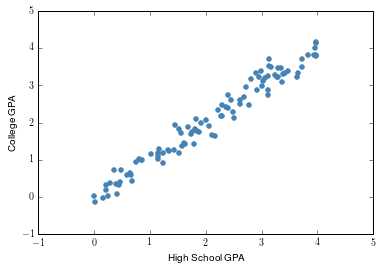

In [10]:
plt.scatter(high_school_gpas, college_gpas, color='steelblue')
plt.ylabel('College GPA')
plt.xlabel('High School GPA')

Now let's say that we didn't create this data and we wanted to identify the relationship between the High School and College GPA. We can do that by fitting a linear model to this data.

With Python we can fit a Linear Model using the `statsmodels` library. Fitting a linear model involves using [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) to identify the parameters. In this lecture I won't go over how this works, but you should look into it later if you plan on fitting linear models.

In [18]:
import statsmodels.api as sm

X = sm.add_constant(high_school_gpas)
#We put in our y-variable and then our x-variable
result = sm.OLS(college_gpas, X).fit()

The fitted result has a number of features, but the one that we care about most is the `summary()`. This tells us about our fitted model.

In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2754.
Date:                Wed, 26 Aug 2015   Prob (F-statistic):           1.52e-73
Time:                        22:57:27   Log-Likelihood:                 10.782
No. Observations:                 100   AIC:                            -17.56
Df Residuals:                      98   BIC:                            -12.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0125      0.046     -0.274      0.784        -0.103     0.078
x1             1.0024      0.019     52.477      0.000         0.965     1.040
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.526
Skew:                           0.155   Prob(JB):                        0.769
Kurtosis:                       2.828   Cond. No.                         5.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we can plot the best-fit line along with the data.

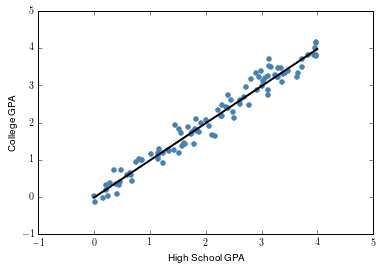

In [21]:
#Here is the data again
plt.scatter(high_school_gpas, college_gpas, color='steelblue')
#Now for our equation
x = np.linspace(0, 4, 100)
y = 0.9978 * x - 0.0125
plt.plot(x, y, color='black', linewidth=2)
#Our labelled axes
plt.ylabel('College GPA')
plt.xlabel('High School GPA')

Pretty darn good!

In [ ]:
import pandas as pd

In [ ]:
#I import the 'formula' style of statsmodels
#There is a more pythonic way to use it and you would import
#statmodels.api to use that form
#In any case, statsmodels is a little odd (it's pretty young)
#And no matter what you'll always need to import as:
#import statmodels.api
#or
#import statmodels.formula.api
#You can do `import statsmodels` and it will import without an error
#But none of the functions we are interested work from that level of import
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('../Data/individual_physical_attributes.csv')

df.head()

,Initial_Weight,Final_Weight,Height,Age,Gender
0,144,142,64,52,female
1,310,310,66,42,female
2,195,195,63,35,female
3,123,122,62,40,female
4,242,242,74,22,male


In [4]:
#First, I create a model.
#I'm going to use Ordinary Least Squares (OLS) to fit the multivariate regression
#In this setup I give it a formula that is a string
#And this formula is just the regreassion equation I want fitted it is:
#variable_of_interest = coefficient*column + ....
#Which is written as:
#variable_of_interest ~ column_name + ....
#Notice the switch from a `=` to a `~` when we actually create it
#Next, we just tell it that this formula should be applied to our dataframe by setting data = df
#To note, we just create the model here
model = smf.ols(formula = 'Final_Weight ~ Height + Age', data = df)

#To run the model we have to fit it, This will get the best coefficients using OLS
result = model.fit()

In [5]:
#To look at the result, we typically just examine the summary from it
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Final_Weight   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     4367.
Date:                Fri, 27 Mar 2015   Prob (F-statistic):               0.00
Time:                        11:47:34   Log-Likelihood:            -2.5081e+05
No. Observations:               47094   AIC:                         5.016e+05
Df Residuals:                   47091   BIC:                         5.017e+05
Df Model:                           2                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -207.6803      4.284    -48.479      0.000      -216.077  -199.284
Height         6.0000      0.065     92.603      0.000         5.873     6.127
Age            0.0918      0.007     12.452      0.000         0.077     0.106
==============================================================================
Omnibus:                    67087.778   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        204627812.767
Skew:                           7.614   Prob(JB):                         0.00
Kurtosis:                     325.568   Cond. No.                     1.50e+03
==============================================================================

Warnings:
[1] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#We can access the parameters from the result by accessing the params
#This is a Pandas Series
result.params

Intercept   -207.680304
Height         5.999980
Age            0.091756
dtype: float64

In [1]:
from IPython.core.display import HTML
from IPython.lib.display import YouTubeVideo


def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()